# Lesson 6 - Problem Set 3: Analyzing Subway Data
https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/weather_underground.csv

## Useful functions

In [2]:
def input_dir():
    return os.getcwd() + '/data/input/'

def output_dir():
    return os.getcwd() + '/data/output/'

In [3]:
def read_csv_data(filename, input_dir):
    '''
    Receives a file name (csv)
    Returns a DataFrame
    '''
    data = pd.read_csv(input_dir + filename)
    
    #Rename the columns by replacing spaces with underscores and setting all characters to lowercase
    data.rename(columns = lambda x: x.replace(' ', '_').lower(), inplace=True)
    
    return data

In [4]:
def exe_sql_query(data, query):
    '''
    Receives a DataFrame and a String (SQL query)
    Execute SQL query and returns a DataFrame
    '''

    q = """
        {0}
    """.format(query)

    #Execute your SQL command against the pandas frame
    # OBS: case sensitive
    solution = pdsql.sqldf(q, locals())
    return solution

In [5]:
def get_rainy_days(data):
    query = """
        SELECT entriesn_hourly FROM data WHERE rain > 0;
    """

    return exe_sql_query(data, query)

In [6]:
def get_not_rainy_days(data):
    query = """
        SELECT entriesn_hourly FROM data WHERE rain == 0;
    """

    return exe_sql_query(data, query)

## Quiz 1: Exploratory Data Analysis
Before perform any analysis, it might be useful to take a look at the data we're hoping to analyze. More specifically, let's examine the hourly entries in our NYC subway data and determine what distribution the data follows. 

This data is stored in a datafram called turnstile_weather under the ['ENTRIESn_hourly'] column.

* Let's plot two histograms on the same axes to show hourly entries when raining vs. when not raining. 

    * Here's an example on how to plot histograms with pandas and matplotlib:
    
    turnstile_weather['column_to_graph'].hist()
    
You can read a bit about using matplotlib and pandas to plot histograms here: http://pandas.pydata.org/pandas-docs/stable/visualization.html#histograms
    
You can see the information contained within the turnstile weather data here: https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv

In [7]:
import numpy as np
import pandas as pd
import pandasql as pdsql

%matplotlib inline
import matplotlib.pyplot as plt


import os

In [8]:
def entries_histogram(rainy_data, not_rainy_data):
    
    df = pd.DataFrame({'Rain': rainy_data['entriesn_hourly'], 'No Rain': not_rainy_data['entriesn_hourly']}, columns=['Rain', 'No Rain'])
    
    df.hist()
    df.plot.hist(alpha=0.4)
    df.plot.hist(stacked=True, bins=20)



In [9]:
weather_data = read_csv_data('turnstile-data-master-with_weather.csv',input_dir())
print (weather_data)

        unnamed:_0  unit       daten     timen  hour    descn  \
0                0  R001  2011-05-01  01:00:00     1  REGULAR   
1                1  R001  2011-05-01  05:00:00     5  REGULAR   
2                2  R001  2011-05-01  09:00:00     9  REGULAR   
3                3  R001  2011-05-01  13:00:00    13  REGULAR   
4                4  R001  2011-05-01  17:00:00    17  REGULAR   
5                5  R001  2011-05-01  21:00:00    21  REGULAR   
6                6  R002  2011-05-01  01:00:00     1  REGULAR   
7                7  R002  2011-05-01  05:00:00     5  REGULAR   
8                8  R002  2011-05-01  09:00:00     9  REGULAR   
9                9  R002  2011-05-01  13:00:00    13  REGULAR   
10              10  R002  2011-05-01  17:00:00    17  REGULAR   
11              11  R002  2011-05-01  21:00:00    21  REGULAR   
12              12  R003  2011-05-01  00:00:00     0  REGULAR   
13              13  R003  2011-05-01  04:00:00     4  REGULAR   
14              14  R003 

In [10]:
rainy_data = get_rainy_days(weather_data)
not_rainy_data = get_not_rainy_days(weather_data)

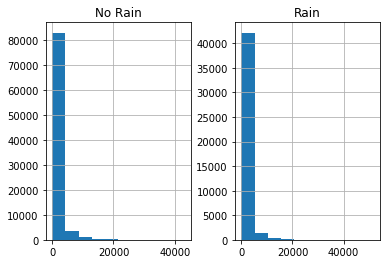

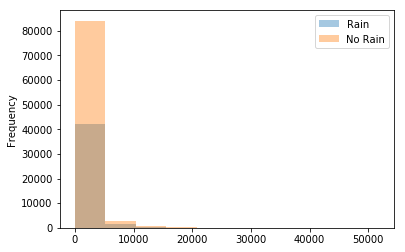

In [11]:
entries_histogram(rainy_data, not_rainy_data)